In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
from numpy import linalg as LA
from scipy.linalg import fractional_matrix_power

## Import Datapoints

In [18]:
X = np.genfromtxt("hw08_data_set.csv", delimiter = ",")
N = X.shape[0]
K = 5

## Distance matrix

In [19]:
B = np.zeros((N, N))

In [20]:
initial_distances = spa.distance_matrix(X, X)
B[initial_distances <= 1.25] = 1
np.fill_diagonal(B, 0)

In [21]:
D = np.zeros((N, N))
np.fill_diagonal(D, np.sum(B, axis = 0))


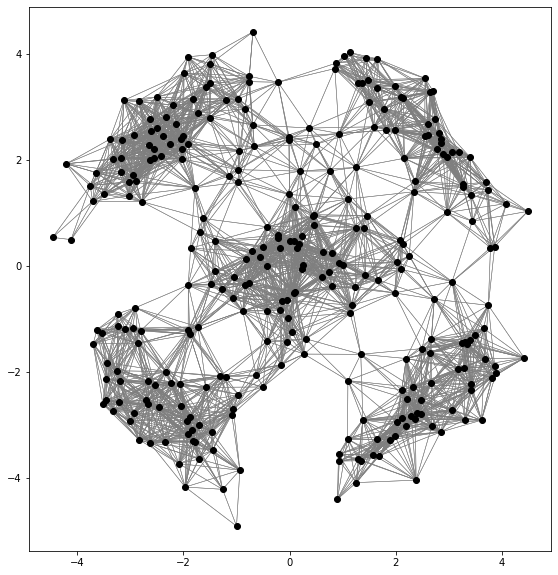

In [22]:
plt.figure(figsize = (10, 10))
plt.gca().set_aspect('equal', adjustable='box')
for i in range(N):
    for j in np.nonzero(B[i])[0]:
        plt.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color = 'tab:gray', lw = 0.5)
plt.plot(X[:,0], X[:,1], "ko")
plt.show()

In [23]:
I = np.eye(N)
D2 = np.asarray(fractional_matrix_power(D, -1/2))

L = I - np.matmul(np.matmul(D2, B), D2)

In [24]:
w, v = LA.eig(L) 
#pick first 5 smallest eigenvectors
w = np.real(w) #eigenvalue
v = np.real(v) #eigenvector
R = 5
Z = v[:,w.argsort() [0:R]]

In [25]:
def update_centroids(memberships, Z):
    if memberships is None:
        # initialize centroids
        centroids = Z[(28, 142, 203, 270, 276),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(Z[memberships == k,], axis = 0) for k in range(K)])
    return centroids

def update_memberships(centroids, Z):
    # calculate distances between centroids and data points
    D1 = spa.distance_matrix(centroids, Z)
    # find the nearest centroid for each data point
    memberships = np.argmin(D1, axis = 0)
    return memberships

In [26]:
centroids = None
memberships = None
iteration = 1
while True:

    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break
    iteration = iteration + 1

Text(0, 0.5, 'x2')

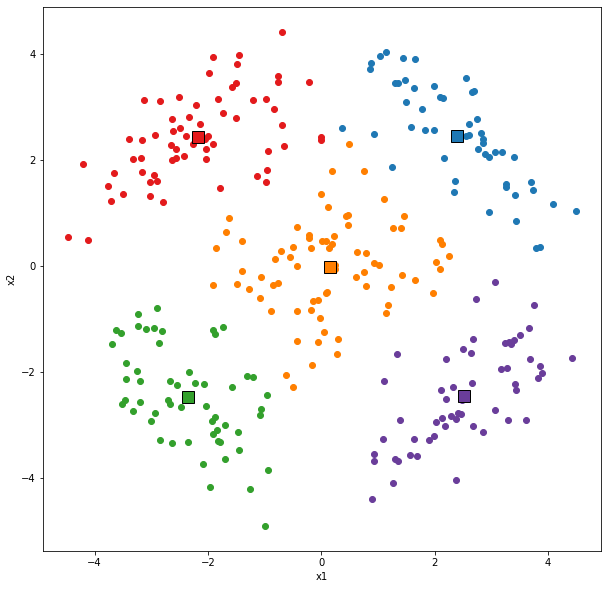

In [27]:
plt.figure(figsize=(10,10))  
cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"])
  
for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 12,
                color = cluster_colors[c])
centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
for c in range(K):
    plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                markerfacecolor = cluster_colors[c], markeredgecolor = "black")


plt.xlabel("x1")
plt.ylabel("x2")